In [1]:
#This code is similar to the one used in astroML book
#Import the required modules
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from astroML.resample import bootstrap
from astroML.stats import median_sigmaG

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=False)

In [2]:
samples = 1000
bootstrap_samples = 10000

np.random.seed(123)
data = norm(0, 1).rvs(samples)    #1000 samples drawn

#The bootstrap function returns arrays of median and sigmaG
median, sigmaG = bootstrap(data, bootstrap_samples, median_sigmaG, kwargs = dict(axis=1)) #10000 bootstraped samples are drawn
x = np.linspace(-2, 2, 5000)

sigma = np.sqrt(np.pi/(2.0*samples))#The standard deviation for the median as per the question
pdf = norm(np.mean(median), sigma).pdf(x)


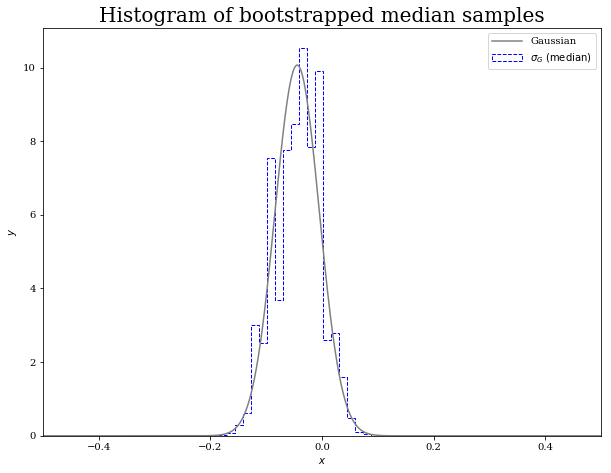

In [3]:
fig, ax = plt.subplots(figsize=(10, 7.5))

#Histogram of the median
ax.hist(median, bins=20, density=True, histtype='step', color='blue', ls='dashed', label=r'$\sigma_G\ {\rm (median)}$')

#Gaussian fit of the median
ax.plot(x, pdf, color='gray', label='Gaussian')

ax.set_xlim(-0.5, 0.5)
plt.title('Histogram of bootstrapped median samples', size=20)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

ax.legend()

plt.show()
